Session 2 notebook

In [42]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tld import get_tld
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from interpret.glassbox import ExplainableBoostingClassifier
import xgboost as xgb

In [43]:
df = pd.read_csv('Phishing_Mitre_Dataset_Summer_of_AI.csv')

In [44]:
#create URL features

def entropy(url_string):
        string = url_string.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return abs(entropy)
    
def has_www(url_string):
    if (url_string.find('www.') == -1):
        return 0
    else:
        return 1
    
df['url_length'] = df['URL'].apply(len)
df['url_entropy'] = df['URL'].apply(entropy)
df['3rd_level_domain'] = df['URL'].apply(has_www)

df['count_non_alpha_full'] = df['URL'].str.findall(r'[^a-zA-Z]').str.len() 

In [45]:
df.head()

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,count_non_alpha_full
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1,70,4.612783,0,32
1,212,16,663,http://www.coffeespecialties.com/...,0,36,3.819114,1,9
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1,73,4.370385,0,35
3,198,6,186,http://atomicsoda.com/manutd...,0,31,3.695501,0,8
4,240,24,1684,http://bostoncoffeecake.com/...,0,31,3.760017,0,8


(array([4.475e+03, 2.370e+02, 4.300e+01, 1.100e+01, 5.000e+00, 1.300e+01,
        1.200e+01, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-115. ,  892.4, 1899.8, 2907.2, 3914.6, 4922. , 5929.4, 6936.8,
        7944.2, 8951.6, 9959. ]),
 <BarContainer object of 10 artists>)

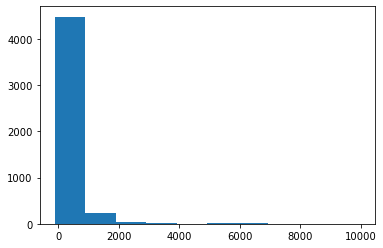

In [46]:
plt.hist(df['update_age(days)'])

In [47]:
df.shape

(4799, 9)

In [48]:
#imputer

df['create_age(months)'][df['create_age(months)']<0]=np.nan
df['expiry_age(months)'][df['expiry_age(months)']<0]=np.nan
df['update_age(days)'][df['update_age(days)']<0]=np.nan

df_dropped = df.dropna()

df_impute = df.copy()

df_impute['create_age(months)'].fillna((df_impute['create_age(months)'].mean()),inplace=True)
df_impute['expiry_age(months)'].fillna((df_impute['expiry_age(months)'].mean()),inplace=True)
df_impute['update_age(days)'].fillna((df_impute['update_age(days)'].mean()),inplace=True)

<ipython-input-48-d9a4c77fcb38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['create_age(months)'][df['create_age(months)']<0]=np.nan
<ipython-input-48-d9a4c77fcb38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expiry_age(months)'][df['expiry_age(months)']<0]=np.nan
<ipython-input-48-d9a4c77fcb38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['update_age(days)'][df['update_age(days)']<0]=np.nan


In [49]:
#imputed df models
X = df_impute[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

y = df_impute['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)
f1_score(y_test, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9117043121149898

In [51]:
KNN = KNeighborsClassifier().fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1_score(y_test, y_pred)

0.9063745019920318

In [52]:
DTC = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = DTC.predict(X_test)
f1_score(y_test, y_pred)

0.8994923857868021

In [53]:
GNB = GaussianNB().fit(X_train, y_train)
y_pred = GNB.predict(X_test)
f1_score(y_test, y_pred)

0.8984293193717278

In [54]:
SVMC = svm.SVC().fit(X_train, y_train)
y_pred = SVMC.predict(X_test)
f1_score(y_test, y_pred)

0.8873379860418743

In [55]:
RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = RF.predict(X_test)
f1_score(y_test, y_pred)

0.8814229249011858

In [56]:
ADA = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = ADA.predict(X_test)
f1_score(y_test, y_pred)

0.9271255060728745

In [57]:
ebm = ExplainableBoostingClassifier().fit(X_train, y_train)
y_pred = ebm.predict(X_test)
f1_score(y_test, y_pred)

0.9271255060728745

In [58]:
XGB = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = XGB.predict(X_test)
f1_score(y_test, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9345417925478349

In [59]:
#dropped df models
X = df_dropped[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

y = df_dropped['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)
f1_score(y_test, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9505962521294719

In [61]:
KNN = KNeighborsClassifier().fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1_score(y_test, y_pred)

0.9147826086956522

In [62]:
DTC = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = DTC.predict(X_test)
f1_score(y_test, y_pred)

0.9375

In [63]:
GNB = GaussianNB().fit(X_train, y_train)
y_pred = GNB.predict(X_test)
f1_score(y_test, y_pred)

0.9222972972972973

In [64]:
SVMC = svm.SVC().fit(X_train, y_train)
y_pred = SVMC.predict(X_test)
f1_score(y_test, y_pred)

0.883720930232558

In [65]:
RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = RF.predict(X_test)
f1_score(y_test, y_pred)

0.903225806451613

In [66]:
ADA = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred = ADA.predict(X_test)
f1_score(y_test, y_pred)

0.9637305699481864

In [67]:
ebm = ExplainableBoostingClassifier().fit(X_train, y_train)
y_pred = ebm.predict(X_test)
f1_score(y_test, y_pred)

0.9541595925297113

In [68]:
XGB = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = XGB.predict(X_test)
f1_score(y_test, y_pred)

[14:56:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9554794520547946

# Test Data

In [69]:
test_df = pd.read_csv('Summer_of_AI_Test_Students.csv')

test_df['url_length'] = test_df['URL'].apply(len)
test_df['url_entropy'] = test_df['URL'].apply(entropy)
test_df['3rd_level_domain'] = test_df['URL'].apply(has_www)

test_df['count_non_alpha_full'] = test_df['URL'].str.findall(r'[^a-zA-Z]').str.len() 


test_df['create_age(months)'][test_df['create_age(months)']<0]=np.nan
test_df['expiry_age(months)'][test_df['expiry_age(months)']<0]=np.nan
test_df['update_age(days)'][test_df['update_age(days)']<0]=np.nan

<ipython-input-69-951b0c04da21>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['create_age(months)'][test_df['create_age(months)']<0]=np.nan
<ipython-input-69-951b0c04da21>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['expiry_age(months)'][test_df['expiry_age(months)']<0]=np.nan
<ipython-input-69-951b0c04da21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['update_age(days)'][test_df['update_age(days)

In [70]:
X = test_df[['create_age(months)','expiry_age(months)', 'update_age(days)', 'url_length', 'url_entropy',
       '3rd_level_domain', 'count_non_alpha_full']]

In [71]:
test_df['Label'] = XGB.predict(X)

In [72]:
test_df.head()

,create_age(months),expiry_age(months),update_age(days),URL,Label,url_length,url_entropy,3rd_level_domain,count_non_alpha_full
0,200.0,40.0,114.0,http://www.classteacher.com/...,0,31,3.708093,1,9
1,210.0,6.0,181.0,http://www.deadendrecords.com/...,0,33,3.775476,1,9
2,98.0,22.0,81.0,http://www.specialisttrading.com/charts/4rfv/L...,1,73,4.477936,1,17
3,NaN,NaN,NaN,http://www.mingshun.com.tw/...,1,30,3.606239,1,10
4,181.0,11.0,426.0,http://www.jers.com/...,0,23,3.518370,1,9
